In [120]:
import pandas as pd

In [121]:
# Cargar datos
csv_path = "../../data/processed/btc_gold.csv"
btc = pd.read_csv(csv_path)

In [122]:
btc['Date'] = pd.to_datetime(btc['Date'])

In [123]:
btc.set_index('Date', inplace=True)

In [124]:
btc.head()

,Close,Open,log_return,delta_close,close_lag1,close_lag2,close_lag3,sma_7,sma_14,ema_14,...,rolling_std_14,bollinger_width,volume_log,volume_sma_5,obv,day_of_week,is_month_end,trend_sequence,month,target
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-28,33466.097656,30441.041016,0.095020,3033.550781,30432.546875,32569.849609,32366.392578,32313.952846,34459.100865,33591.160848,...,2463.028807,27.550736,25.060781,6.157805e+10,235792521820,3,0,33,1,1
2021-01-29,34316.386719,34318.671875,0.025090,850.289062,33466.097656,30432.546875,32569.849609,32501.184989,34111.176479,33687.857630,...,2053.779943,23.207313,25.493057,7.542819e+10,353687094331,4,0,34,1,0
2021-01-30,34269.523438,34295.933594,-0.001367,-46.863281,34316.386719,33466.097656,30432.546875,32815.739397,33928.616211,33765.413071,...,1901.938359,21.607173,24.899833,7.647715e+10,288545265533,5,0,35,1,0
2021-01-31,33114.359375,34270.878906,-0.034289,-1155.164062,34269.523438,34316.386719,33466.097656,32933.593750,33709.774693,33678.605912,...,1796.534599,20.542220,24.688916,7.497697e+10,235790722862,6,1,36,1,1
2021-02-01,33537.175781,33114.578125,0.012688,422.816406,33114.359375,34269.523438,34316.386719,33100.848493,33548.767439,33659.748561,...,1693.702947,19.459350,24.840682,7.474170e+10,297191123522,0,0,37,2,1


In [125]:
btc.tail()

,Close,Open,log_return,delta_close,close_lag1,close_lag2,close_lag3,sma_7,sma_14,ema_14,...,rolling_std_14,bollinger_width,volume_log,volume_sma_5,obv,day_of_week,is_month_end,trend_sequence,month,target
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-27,87177.101562,86896.257812,0.003174,276.218750,86900.882812,87471.703125,87498.914062,86139.814732,85120.443638,85781.479940,...,1785.359070,8.084615,23.918401,2.566012e+10,-561404247296,3,0,1545,3,0
2025-03-28,84353.148438,87185.234375,-0.032930,-2823.953125,87177.101562,86900.882812,87471.703125,86184.087054,85147.875558,85591.035740,...,1769.185152,8.008794,24.255451,2.998092e+10,-595602866805,4,0,1546,3,0
2025-03-29,82597.585938,84352.070312,-0.021032,-1755.562500,84353.148438,87177.101562,86900.882812,86007.672991,85023.195312,85191.909100,...,1887.792883,8.558242,23.554677,2.645827e+10,-612572262940,5,0,1547,3,0
2025-03-30,82334.523438,82596.984375,-0.003190,-263.062500,82597.585938,84353.148438,87177.101562,85476.265625,85005.683594,84810.924345,...,1913.169709,8.675074,23.415441,2.340986e+10,-627336023883,6,0,1548,3,1
2025-03-31,82548.914062,82336.062500,0.002601,214.390625,82334.523438,82597.585938,84353.148438,84769.122768,84896.628348,84509.322974,...,2011.259833,9.131569,24.090707,2.386990e+10,-598331795636,0,1,1549,3,0


Dividir los datos en entrenamiento, validación y test

In [126]:
# 1. Crear X e y
X = btc.drop(columns='target')
y = btc['target']

In [127]:
# 2. Definir fechas
train_end = "2025-02-28"
test_start = "2025-03-01"
test_end = "2025-04-12"  # ajusta si actualizas los datos

In [128]:
# 3. Separar datasets
X_train = X[X.index <= train_end]
y_train = y.loc[X_train.index]

X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_test = y.loc[X_test.index]


In [129]:
# 4. Verificar tamaños
print(f"✅ Train: {X_train.shape}")
print(f"✅ Test : {X_test.shape}")

✅ Train: (1486, 27)
✅ Test : (31, 27)


Feature Selection con SelectKBest

In [130]:
from sklearn.feature_selection import SelectKBest, f_classif

In [131]:
# Selección de K mejores features
selector = SelectKBest(score_func=f_classif, k=20)
X_train_kbest = selector.fit_transform(X_train, y_train)

In [132]:
# Aplicar transformación a test
X_test_kbest = selector.transform(X_test)

In [133]:
# Nombres de las columnas seleccionadas
selected_features = X_train.columns[selector.get_support()]
print("✅ Features seleccionadas:", list(selected_features))

✅ Features seleccionadas: ['Close', 'log_return', 'delta_close', 'sma_14', 'ema_14', 'sma_diff', 'ema_ratio', 'close_minus_sma14', 'close_minus_ema14', 'macd', 'rsi_14', 'roc_12', 'rolling_std_14', 'bollinger_width', 'volume_log', 'volume_sma_5', 'obv', 'day_of_week', 'is_month_end', 'trend_sequence']


Ahora si vamos a comenzar con los Modelos

1. Comenzamos con el árbol de desición

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
# 1. Instanciar modelo
dt_model = DecisionTreeClassifier(random_state=42)

In [136]:
# 2. Entrenar
dt_model.fit(X_train_kbest, y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
# 3. Predecir
y_pred = dt_model.predict(X_test_kbest)

In [138]:
# 4. Evaluar
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, log_loss, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
def evaluate_model(model, X_test, y_test):
    # Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas de clasificación
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    logloss = log_loss(y_test, y_proba) if y_proba is not None else None
    r2 = r2_score(y_test, y_proba) if y_proba is not None else None

    print("📊 Evaluación del modelo")
    print(f"✅ Accuracy      : {acc:.4f}")
    print(f"🎯 Precision     : {prec:.4f}")
    print(f"🔁 Recall        : {rec:.4f}")
    print(f"📏 F1-score      : {f1:.4f}")
    if auc is not None:
        print(f"📈 ROC AUC       : {auc:.4f}")
    if logloss is not None:
        print(f"🧮 Log Loss      : {logloss:.4f}")
    if r2 is not None:
        print(f"📐 R² Score      : {r2:.4f}")
    print("\n📄 Reporte completo:\n")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['Real: 0', 'Real: 1'])
    plt.title("🔍 Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.tight_layout()
    plt.show()

In [140]:
def simulate_trading_real_returns(df_prices, y_proba, threshold_buy=0.52, threshold_sell=0.48, initial_balance=1000):
    df = df_prices.copy()
    df['y_proba'] = y_proba

    # 1. Generar señales de trading
    df['signal'] = df['y_proba'].apply(lambda p: 1 if p > threshold_buy else (-1 if p < threshold_sell else 0))

    # 2. Calcular retorno porcentual real del activo entre día t y t+1
    df['real_return'] = df['Close'].pct_change().shift(-1).fillna(0)

    # 3. Calcular retorno de la estrategia según señal
    df['strategy_return'] = df['signal'] * df['real_return']

    # 4. Calcular equity (balance acumulado)
    df['strategy'] = (df['strategy_return'] + 1).cumprod()
    df['equity'] = initial_balance * df['strategy']

    # 5. Sharpe ratio (riesgo-rentabilidad)
    daily_returns = df['strategy_return']
    sharpe = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252) if np.std(daily_returns) > 0 else 0

    # 6. Máximo drawdown
    rolling_max = df['equity'].cummax()
    drawdown = df['equity'] / rolling_max - 1
    max_drawdown = drawdown.min()

    # 7. Win rate
    wins = (df['strategy_return'] > 0).sum()
    total_trades = (df['signal'] != 0).sum()
    win_rate = wins / total_trades if total_trades > 0 else 0

    # 8. Curva de equity
    plt.figure(figsize=(10, 4))
    plt.plot(df['equity'], label='Equity Curve')
    plt.title("📈 Simulación de Trading con Retorno Real")
    plt.xlabel("Día")
    plt.ylabel("Balance")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 9. Resultados
    print(f"💰 Retorno Final         : {df['equity'].iloc[-1] - initial_balance:.2f}")
    print(f"📈 Sharpe Ratio          : {sharpe:.4f}")
    print(f"📉 Max Drawdown          : {max_drawdown:.4f}")
    print(f"✅ Win Rate              : {win_rate:.2%}")
    print(f"📊 Nº de operaciones     : {total_trades}")

    return df[['Close', 'y_proba', 'signal', 'real_return', 'strategy_return', 'equity']]

📊 Evaluación del modelo
✅ Accuracy      : 0.4839
🎯 Precision     : 0.4118
🔁 Recall        : 0.5385
📏 F1-score      : 0.4667
📈 ROC AUC       : 0.4915
🧮 Log Loss      : 18.6032
📐 R² Score      : -1.1197

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.57      0.44      0.50        18
           1       0.41      0.54      0.47        13

    accuracy                           0.48        31
   macro avg       0.49      0.49      0.48        31
weighted avg       0.50      0.48      0.49        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


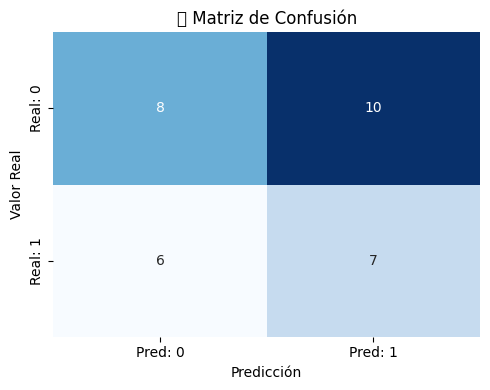

In [141]:
evaluate_model(dt_model, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/3530921800.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


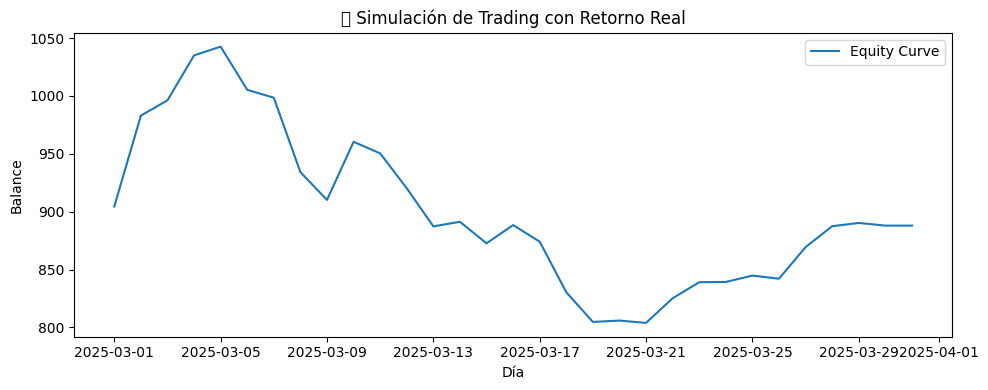

💰 Retorno Final         : -112.06
📈 Sharpe Ratio          : -1.4898
📉 Max Drawdown          : -0.2290
✅ Win Rate              : 48.39%
📊 Nº de operaciones     : 31


,Close,y_proba,signal,real_return,strategy_return,equity
Date,,,,,,
2025-03-01,86031.914062,0.0,-1,0.095505,-0.095505,904.495470
2025-03-02,94248.351562,0.0,-1,-0.086820,0.086820,983.024130
2025-03-03,86065.671875,1.0,1,0.013438,0.013438,996.233699
2025-03-04,87222.195312,1.0,1,0.038997,0.038997,1035.083405
2025-03-05,90623.562500,0.0,-1,-0.007303,0.007303,1042.642756
2025-03-06,89961.726562,1.0,1,-0.035782,-0.035782,1005.334401
2025-03-07,86742.671875,1.0,1,-0.006780,-0.006780,998.518665
2025-03-08,86154.593750,1.0,1,-0.064460,-0.064460,934.153809
2025-03-09,80601.039062,1.0,1,-0.025670,-0.025670,910.173960


In [142]:
y_proba = dt_model.predict_proba(X_test_kbest)[:, 1]


simulate_trading_real_returns(
    df_prices=X_test.copy(),  # debe contener al menos la columna 'Close'
    y_proba=y_proba
)

In [143]:
print(np.unique(dt_model.predict_proba(X_test_kbest)[:, 1]))

[0. 1.]


Usa GridSearchCV para probar varias combinaciones

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
# 1. Definir el grid de hiperparámetros
param_grid = {
    'max_depth': [1, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 4, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# 2. Instanciar el modelo base
base_tree = DecisionTreeClassifier(random_state=42)

# 3. Grid search con validación cruzada
grid_search = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [146]:
# 4. Ajustar con el set de entrenamiento
grid_search.fit(X_train_kbest, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 12, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5, 7, 10],
                         'min_samples_split': [2, 4, 5, 7, 10]},
             scoring='accuracy', verbose=1)

In [147]:
# 5. Resultado
print("✅ Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

✅ Mejor combinación de hiperparámetros:
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2}


In [148]:
# 6. Modelo optimizado
best_tree = grid_search.best_estimator_

📊 Evaluación del modelo
✅ Accuracy      : 0.5484
🎯 Precision     : 0.4615
🔁 Recall        : 0.4615
📏 F1-score      : 0.4615
📈 ROC AUC       : 0.4679
🧮 Log Loss      : 4.1332
📐 R² Score      : -0.3477

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.46      0.46      0.46        13

    accuracy                           0.55        31
   macro avg       0.54      0.54      0.54        31
weighted avg       0.55      0.55      0.55        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


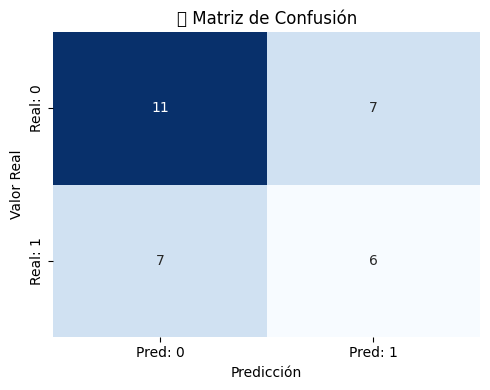

In [149]:
evaluate_model(best_tree, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/3530921800.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


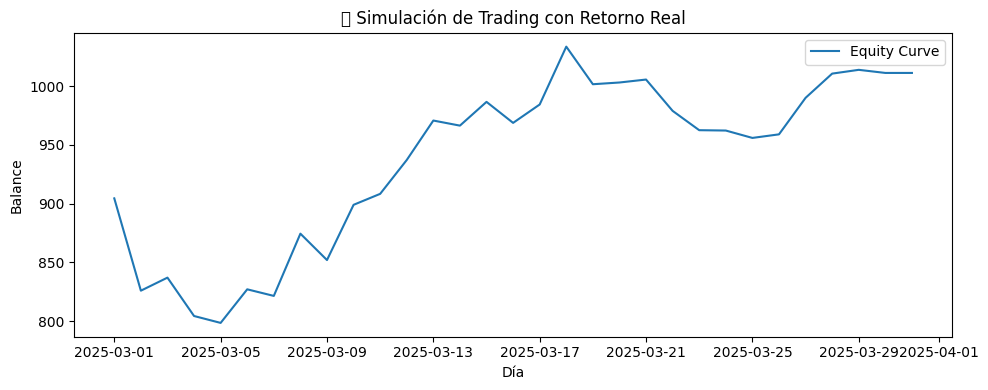

💰 Retorno Final         : 11.20
📈 Sharpe Ratio          : 0.4447
📉 Max Drawdown          : -0.1171
✅ Win Rate              : 51.61%
📊 Nº de operaciones     : 31


,Close,y_proba,signal,real_return,strategy_return,equity
Date,,,,,,
2025-03-01,86031.914062,0.333333,-1,0.095505,-0.095505,904.495470
2025-03-02,94248.351562,1.000000,1,-0.086820,-0.086820,825.966811
2025-03-03,86065.671875,0.727273,1,0.013438,0.013438,837.065893
2025-03-04,87222.195312,0.375000,-1,0.038997,-0.038997,804.423187
2025-03-05,90623.562500,0.625000,1,-0.007303,-0.007303,798.548378
2025-03-06,89961.726562,0.457831,-1,-0.035782,0.035782,827.122428
2025-03-07,86742.671875,0.636364,1,-0.006780,-0.006780,821.514892
2025-03-08,86154.593750,0.457831,-1,-0.064460,0.064460,874.470024
2025-03-09,80601.039062,0.571429,1,-0.025670,-0.025670,852.022266


In [150]:
y_proba = best_tree.predict_proba(X_test_kbest)[:, 1]

simulate_trading_real_returns(
    df_prices=X_test.copy(),  # debe contener al menos la columna 'Close'
    y_proba=y_proba
)

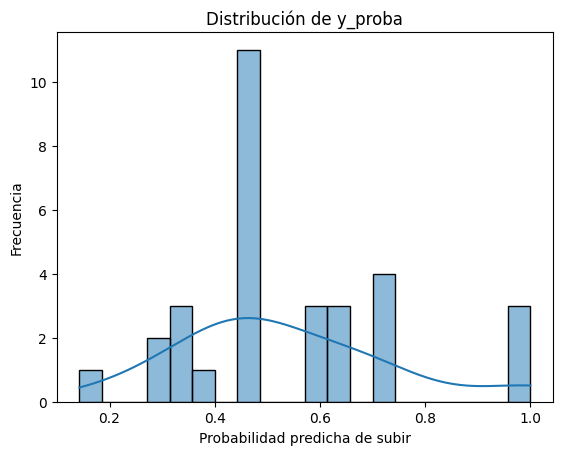

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_proba, bins=20, kde=True)
plt.title("Distribución de y_proba")
plt.xlabel("Probabilidad predicha de subir")
plt.ylabel("Frecuencia")
plt.show()

In [152]:
print(np.unique(best_tree.predict_proba(X_test_kbest)[:, 1]))

[0.14285714 0.27272727 0.33333333 0.375      0.45783133 0.57142857
 0.60869565 0.625      0.63636364 0.71428571 0.72727273 1.        ]


Vamos a implementar el modelo de Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
# 1. Instanciar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [155]:
# 2. Entrenar
rf_model.fit(X_train_kbest, y_train)

RandomForestClassifier(random_state=42)

In [156]:
# 3. Predecir
y_pred_rf = rf_model.predict(X_test_kbest)
y_proba_rf = rf_model.predict_proba(X_test_kbest)[:, 1]  # Probabilidad de clase 1

📊 Evaluación del modelo
✅ Accuracy      : 0.4194
🎯 Precision     : 0.3810
🔁 Recall        : 0.6154
📏 F1-score      : 0.4706
📈 ROC AUC       : 0.4936
🧮 Log Loss      : 0.6985
📐 R² Score      : -0.0389

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.50      0.28      0.36        18
           1       0.38      0.62      0.47        13

    accuracy                           0.42        31
   macro avg       0.44      0.45      0.41        31
weighted avg       0.45      0.42      0.40        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


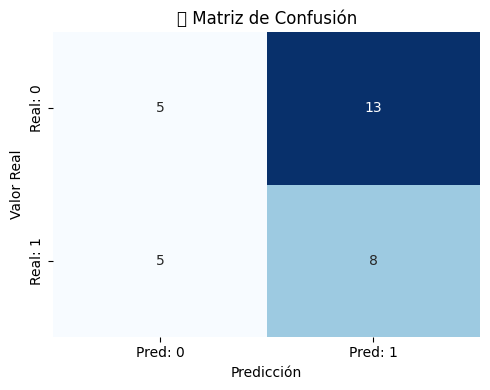

In [157]:
# 4. Evaluar
evaluate_model(rf_model, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/3530921800.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


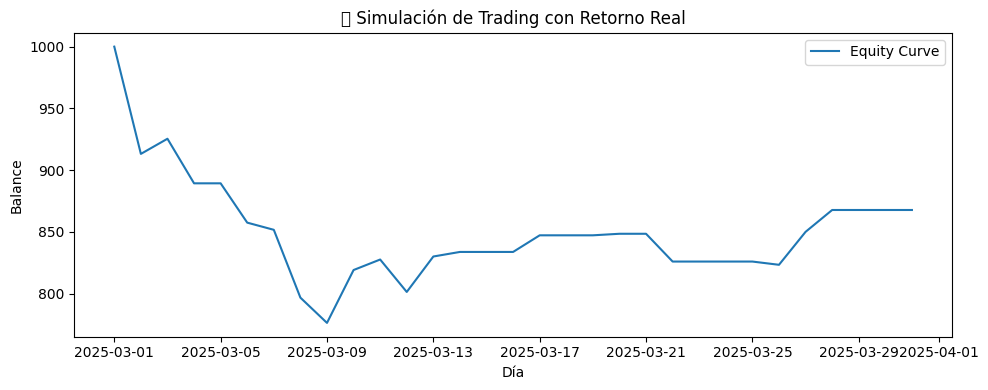

💰 Retorno Final         : -132.23
📈 Sharpe Ratio          : -2.4551
📉 Max Drawdown          : -0.2236
✅ Win Rate              : 50.00%
📊 Nº de operaciones     : 18


,Close,y_proba,signal,real_return,strategy_return,equity
Date,,,,,,
2025-03-01,86031.914062,0.49,0,0.095505,0.000000,1000.000000
2025-03-02,94248.351562,0.53,1,-0.086820,-0.086820,913.179599
2025-03-03,86065.671875,0.58,1,0.013438,0.013438,925.450619
2025-03-04,87222.195312,0.39,-1,0.038997,-0.038997,889.361211
2025-03-05,90623.562500,0.51,0,-0.007303,-0.000000,889.361211
2025-03-06,89961.726562,0.58,1,-0.035782,-0.035782,857.537652
2025-03-07,86742.671875,0.59,1,-0.006780,-0.006780,851.723914
2025-03-08,86154.593750,0.62,1,-0.064460,-0.064460,796.821498
2025-03-09,80601.039062,0.59,1,-0.025670,-0.025670,776.366988


In [158]:
# 5. Simular trading
simulate_trading_real_returns(
    df_prices=X_test.copy(),  # debe contener al menos la columna 'Close'
    y_proba=y_proba_rf
)

✅ Importancia de características:
Close: 0.0460
log_return: 0.0549
delta_close: 0.0585
sma_14: 0.0429
ema_14: 0.0424
sma_diff: 0.0553
ema_ratio: 0.0557
close_minus_sma14: 0.0561
close_minus_ema14: 0.0516
macd: 0.0550
rsi_14: 0.0541
roc_12: 0.0548
rolling_std_14: 0.0563
bollinger_width: 0.0561
volume_log: 0.0566
volume_sma_5: 0.0559
obv: 0.0629
day_of_week: 0.0288
is_month_end: 0.0031
trend_sequence: 0.0530


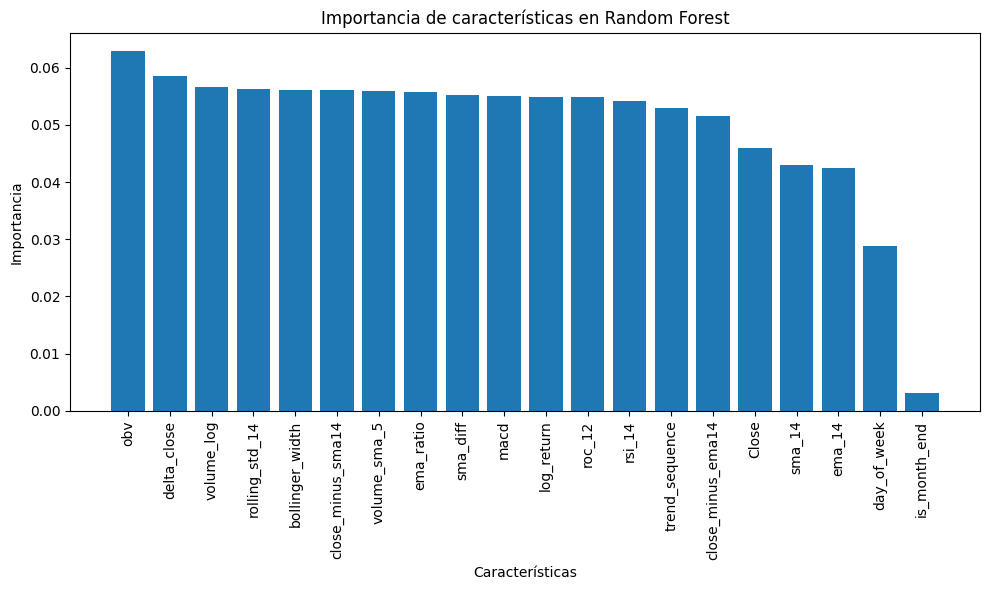

In [159]:
# 6. Importancia de características
importances = rf_model.feature_importances_
print("✅ Importancia de características:")
for feature, importance in zip(X_train.columns[selector.get_support()], importances):
    print(f"{feature}: {importance:.4f}")
# Gráfico de importancias
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train_kbest.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_kbest.shape[1]), np.array(X_train.columns[selector.get_support()])[indices], rotation=90)
plt.title("Importancia de características en Random Forest")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

Tuning con GridSearchCV para Random Forest

In [160]:
# 1. Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],            # número de árboles
    'max_depth': [3, 5, 7, 10],           # profundidad máxima
    'min_samples_split': [2, 5, 10],            # mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4],              # mínimo de muestras en hoja
    'max_features': ['sqrt', 'log2'],     # número de features a usar por split
    'bootstrap': [True, False],                 # si se hace bootstrap
    'criterion': ['gini', 'entropy']            # función de impureza
}

# 2. Instanciar el modelo base
base_rf = RandomForestClassifier(random_state=42)

# 3. Búsqueda en grilla con validación cruzada
grid_search_rf = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,                # puedes bajarlo a 3 si hay pocos datos
    n_jobs=-1,
    verbose=3
)

In [161]:
# 4. Ajustar modelo
grid_search_rf.fit(X_train_kbest, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.498 total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.539 total time=   0.2s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.519 total time=   0.2s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.500 total time=   0.3s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.488 total time=   0.3s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [162]:
# 5. Obtener el mejor modelo
best_rf_model = grid_search_rf.best_estimator_
print("✅ Mejores hiperparámetros encontrados:")
print(grid_search_rf.best_params_)

✅ Mejores hiperparámetros encontrados:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


📊 Evaluación del modelo
✅ Accuracy      : 0.6129
🎯 Precision     : 0.5294
🔁 Recall        : 0.6923
📏 F1-score      : 0.6000
📈 ROC AUC       : 0.6880
🧮 Log Loss      : 0.6670
📐 R² Score      : 0.0264

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.71      0.56      0.62        18
           1       0.53      0.69      0.60        13

    accuracy                           0.61        31
   macro avg       0.62      0.62      0.61        31
weighted avg       0.64      0.61      0.61        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


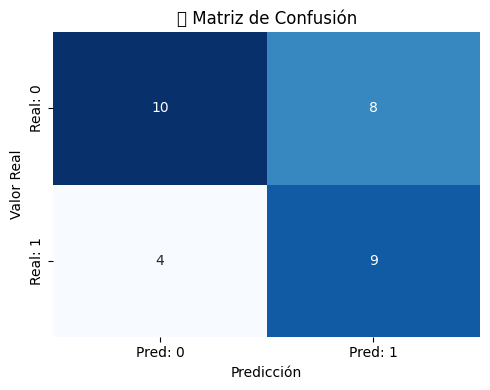

In [163]:
# 6. Evaluar el modelo optimizado
evaluate_model(best_rf_model, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/3530921800.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


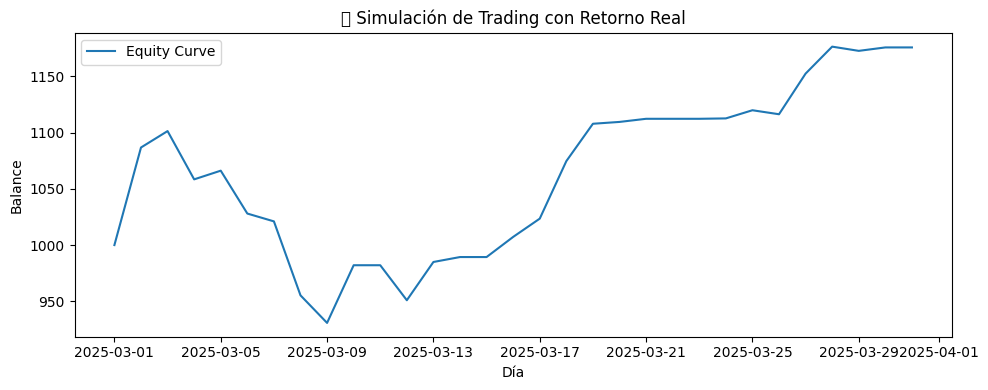

💰 Retorno Final         : 175.87
📈 Sharpe Ratio          : 3.1308
📉 Max Drawdown          : -0.1550
✅ Win Rate              : 65.38%
📊 Nº de operaciones     : 26


,Close,y_proba,signal,real_return,strategy_return,equity
Date,,,,,,
2025-03-01,86031.914062,0.488652,0,0.095505,0.000000,1000.000000
2025-03-02,94248.351562,0.455203,-1,-0.086820,0.086820,1086.820401
2025-03-03,86065.671875,0.609785,1,0.013438,0.013438,1101.424752
2025-03-04,87222.195312,0.478487,-1,0.038997,-0.038997,1058.472955
2025-03-05,90623.562500,0.454833,-1,-0.007303,0.007303,1066.203124
2025-03-06,89961.726562,0.578821,1,-0.035782,-0.035782,1028.051720
2025-03-07,86742.671875,0.589781,1,-0.006780,-0.006780,1021.081970
2025-03-08,86154.593750,0.589734,1,-0.064460,-0.064460,955.262676
2025-03-09,80601.039062,0.585355,1,-0.025670,-0.025670,930.740960


In [164]:
# 7. Simular trading
simulate_trading_real_returns(
    df_prices=X_test.copy(),  # debe contener al menos la columna 'Close'
    y_proba=best_rf_model.predict_proba(X_test_kbest)[:, 1]
)

Vamos con la implementación de AdaBoost

In [165]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [166]:
# 1. Base estimator (usualmente un árbol pequeño)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

In [167]:
# 2. Instanciar AdaBoost
ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)

In [168]:
# 3. Entrenar
ada_model.fit(X_train_kbest, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.8, n_estimators=100, random_state=42)

📊 Evaluación del modelo
✅ Accuracy      : 0.5161
🎯 Precision     : 0.4500
🔁 Recall        : 0.6923
📏 F1-score      : 0.5455
📈 ROC AUC       : 0.6303
🧮 Log Loss      : 0.6748
📐 R² Score      : 0.0103

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.45      0.69      0.55        13

    accuracy                           0.52        31
   macro avg       0.54      0.54      0.51        31
weighted avg       0.56      0.52      0.51        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


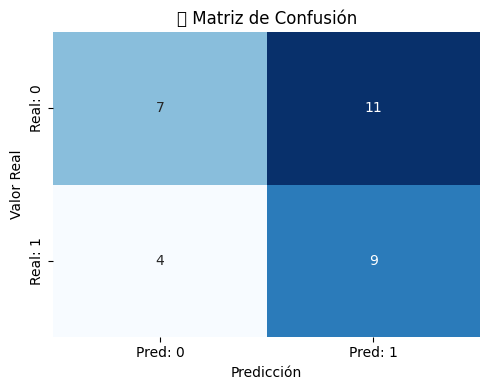

In [169]:
# 4. Evaluar
evaluate_model(ada_model, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/3530921800.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


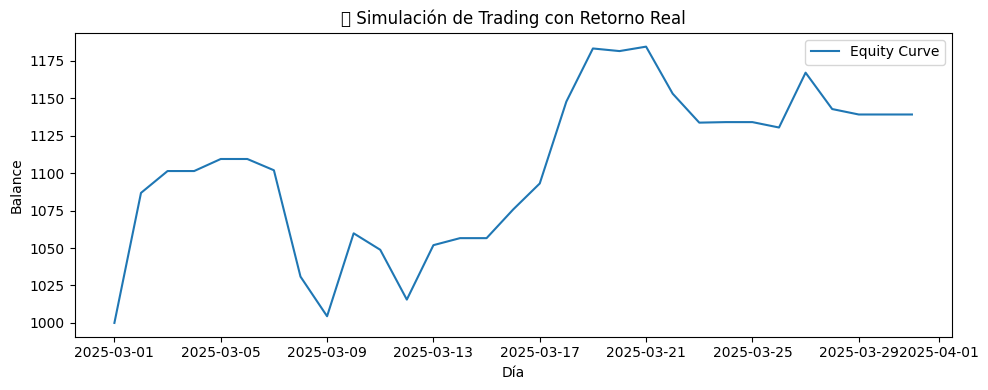

💰 Retorno Final         : 139.19
📈 Sharpe Ratio          : 2.6224
📉 Max Drawdown          : -0.0947
✅ Win Rate              : 54.17%
📊 Nº de operaciones     : 24


,Close,y_proba,signal,real_return,strategy_return,equity
Date,,,,,,
2025-03-01,86031.914062,0.508027,0,0.095505,0.000000,1000.000000
2025-03-02,94248.351562,0.389616,-1,-0.086820,0.086820,1086.820401
2025-03-03,86065.671875,0.527138,1,0.013438,0.013438,1101.424752
2025-03-04,87222.195312,0.508027,0,0.038997,0.000000,1101.424752
2025-03-05,90623.562500,0.469724,-1,-0.007303,0.007303,1109.468603
2025-03-06,89961.726562,0.515474,0,-0.035782,-0.000000,1109.468603
2025-03-07,86742.671875,0.553613,1,-0.006780,-0.006780,1101.946882
2025-03-08,86154.593750,0.553934,1,-0.064460,-0.064460,1030.915008
2025-03-09,80601.039062,0.572761,1,-0.025670,-0.025670,1004.451287


In [170]:
# 5. Simular trading
y_proba_ada = ada_model.predict_proba(X_test_kbest)[:, 1]
simulate_trading_real_returns(X_test.copy(), y_proba_ada)

GridSearchCV para AdaBoostClassifier

In [171]:
# 1. Árbol base débil
base_estimator = DecisionTreeClassifier(random_state=42)

In [172]:
# 1. Árbol base débil
base_estimator = DecisionTreeClassifier(random_state=42)

# 2. Grid de hiperparámetros
param_grid_ada = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.8, 1.0],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_leaf': [1, 2]
}

# 3. Instancia de AdaBoost
ada = AdaBoostClassifier(
    estimator=base_estimator,
    random_state=42
)

# 4. GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=3
)

In [173]:
# 5. Ajustar con entrenamiento
grid_search_ada.fit(X_train_kbest, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=100;, score=0.487 total time=   0.3s
[CV 3/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=100;, score=0.488 total time=   0.3s
[CV 2/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=100;, score=0.495 total time=   0.3s
[CV 4/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=100;, score=0.434 total time=   0.3s
[CV 5/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=100;, score=0.481 total time=   0.3s
[CV 2/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=200;, score=0.495 total time=   0.6s
[CV 1/5] END estimator__max_depth=1, estimator__min_samples_leaf=1, learning_rate=0.01, n_estimators=200;, sc

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'estimator__min_samples_leaf': [1, 2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.8, 1.0],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=3)

In [174]:
# 6. Mostrar el mejor modelo
print("✅ Mejores hiperparámetros:")
print(grid_search_ada.best_params_)

✅ Mejores hiperparámetros:
{'estimator__max_depth': 3, 'estimator__min_samples_leaf': 2, 'learning_rate': 0.8, 'n_estimators': 200}


📊 Evaluación del modelo
✅ Accuracy      : 0.4516
🎯 Precision     : 0.4167
🔁 Recall        : 0.7692
📏 F1-score      : 0.5405
📈 ROC AUC       : 0.5919
🧮 Log Loss      : 0.6953
📐 R² Score      : -0.0313

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.57      0.22      0.32        18
           1       0.42      0.77      0.54        13

    accuracy                           0.45        31
   macro avg       0.49      0.50      0.43        31
weighted avg       0.51      0.45      0.41        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


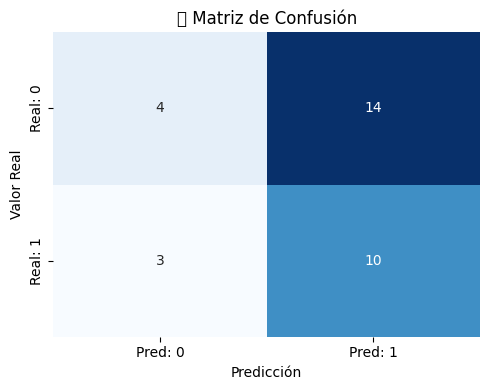

In [175]:
# 7. Evaluar el modelo optimizado
best_ada = grid_search_ada.best_estimator_
evaluate_model(best_ada, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_75914/3530921800.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


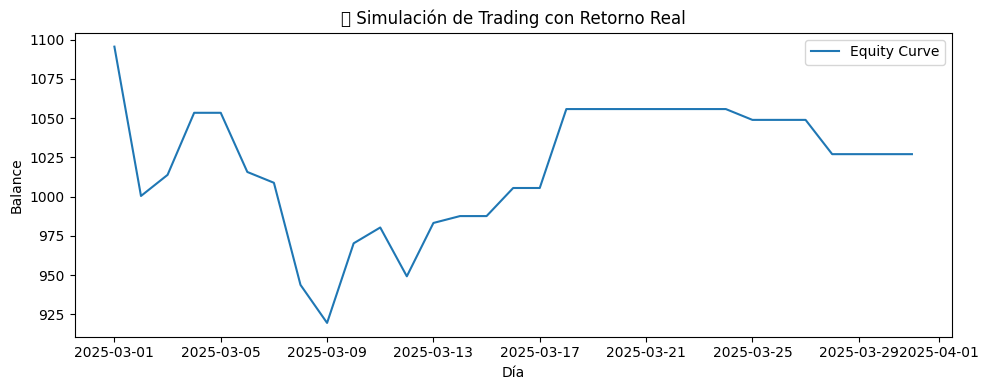

💰 Retorno Final         : 27.03
📈 Sharpe Ratio          : 0.6769
📉 Max Drawdown          : -0.1606
✅ Win Rate              : 50.00%
📊 Nº de operaciones     : 18


,Close,y_proba,signal,real_return,strategy_return,equity
Date,,,,,,
2025-03-01,86031.914062,0.560904,1,0.095505,0.095505,1095.504530
2025-03-02,94248.351562,0.570131,1,-0.086820,-0.086820,1000.392387
2025-03-03,86065.671875,0.601495,1,0.013438,0.013438,1013.835345
2025-03-04,87222.195312,0.550787,1,0.038997,0.038997,1053.371455
2025-03-05,90623.562500,0.499261,0,-0.007303,-0.000000,1053.371455
2025-03-06,89961.726562,0.532576,1,-0.035782,-0.035782,1015.679200
2025-03-07,86742.671875,0.561244,1,-0.006780,-0.006780,1008.793331
2025-03-08,86154.593750,0.551836,1,-0.064460,-0.064460,943.766166
2025-03-09,80601.039062,0.541758,1,-0.025670,-0.025670,919.539567


In [176]:
# 8. Simulación de trading
y_proba_best_ada = best_ada.predict_proba(X_test_kbest)[:, 1]
simulate_trading_real_returns(X_test.copy(), y_proba_best_ada)